# **Project Name**    -  **Online Retail CLUSTERING**



# **Project Summary -**

The goal of this project is to perform clustering analysis on an online retail dataset to identify patterns and segment customers based on their purchasing behaviors. The dataset includes several columns: 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', and 'Country'. The analysis will help to derive actionable insights for improving marketing strategies, product recommendations, and customer retention.

1. Dataset Overview
InvoiceNo: Unique identifier for each invoice.
StockCode: Unique identifier for the product purchased.
Description: Product description.
Quantity: Quantity of items purchased.
InvoiceDate: Date and time of the transaction.
UnitPrice: Price per unit of the product.
CustomerID: Unique identifier for the customer.
Country: Country where the transaction occurred.
2. Project Objectives
Segmentation: Use clustering algorithms (like K-Means or DBSCAN) to group customers based on purchasing patterns, product preferences, and geographic location.
Customer Behavior Analysis: Explore how different segments of customers behave in terms of quantity purchased, frequency, and type of products bought.
Sales Insights: Investigate sales patterns based on geographic regions and product categories.
Product Recommendation: Identify product affinities within customer clusters, which can lead to personalized recommendations.
3. Data Preprocessing
Handling Missing Data: Identify and handle any missing or inconsistent entries in the dataset.
Data Transformation: Convert categorical variables such as 'Country' and 'Description' into numerical formats (e.g., via one-hot encoding) if needed.
Feature Engineering: Calculate additional features, such as:
Total price for each transaction (UnitPrice * Quantity).
Recency, Frequency, and Monetary (RFM) metrics for customers.
4. Clustering Methodology
Feature Selection: Select relevant features for clustering such as 'Quantity', 'UnitPrice', 'Country', and derived RFM values.
Clustering Algorithm: Use clustering algorithms such as K-Means or hierarchical clustering to group customers. The appropriate number of clusters will be determined using methods like the Elbow Method or Silhouette Score.
Cluster Evaluation: Assess the quality and coherence of the clusters using metrics like inertia (for K-Means) or silhouette score.
5. Analysis and Insights
Cluster Profiling: Understand each customer segment by analyzing the characteristics of the clusters, such as average purchase quantity, preferred products, and geographic location.
Sales Distribution: Visualize how different clusters contribute to total sales, and identify high-value clusters.
Customer Behavior Trends: Identify trends in customer purchase behavior across clusters, such as high-frequency, high-value customers or customers from specific countries.
6. Applications
Targeted Marketing: Tailor marketing campaigns to specific customer segments, based on their purchasing behavior and location.
Product Stocking: Optimize product stocking based on the preferences and purchasing habits of different customer segments.
Customer Retention: Use the insights from customer clusters to design personalized offers and improve retention strategies.

# **Problem Statement**

In the online retail business, understanding customer behavior is crucial for improving marketing strategies, personalizing product recommendations, optimizing inventory management, and increasing overall sales. The large volume of transaction data available makes it difficult to manually identify meaningful patterns and customer segments.

The problem we aim to solve is:

 * How can we group customers into distinct clusters based on their purchasing behavior, product preferences, and geographic location to better understand their needs and provide targeted services?
 * How can clustering analysis help us identify high-value customers, frequent buyers, and potential product affinities to optimize sales strategies?

Key challenges include:

 * Customer Segmentation: Identifying meaningful customer segments based on transactional data such as quantities purchased, spending habits, and geographic location.
 * Behavioral Insights: Understanding how different customer segments behave, such as which products are popular in which regions, and how frequently customers make purchases.
 * Product Recommendations: Discovering product affinities and recommending products to customers based on the behavior of similar users.
 * Geographical Influence: Analyzing the impact of customer location on purchasing behavior and identifying region-specific trends.

By addressing these challenges through clustering techniques, this project will provide actionable insights to businesses, enabling them to offer personalized experiences, improve customer satisfaction, and ultimately drive revenue growth.

Attribute Information

he dataset contains the following attributes, each providing different pieces of information about customer transactions:

 1) InvoiceNo : A unique identifier for each invoice (transaction).

 2) StockCode : A unique identifier for the product purchased.

 3) Description : A textual description of the product purchased.

 4) Quantity : The quantity of the product purchased in the transaction.

 5) InvoiceDate : The date and time when the transaction occurred.

 6) UnitPrice : The price of one unit of the product.

 7) CustomerID : A unique identifier for the customer making the purchase.

 8) Country : The country where the customer is located.

## ***1. Know Your Data***

In [ ]:
# import the dependancy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import difflib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Install 1.2.0 version of xlrd because our data is in xls format
!pip install xlrd==2.0.1

### Dataset Loading

In [ ]:
# Import the data
df = pd.read_excel('/content/drive/MyDrive/Data science/Cluster Project/Online Retail.xlsx')

### Dataset First View

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Dataset Rows & Columns count

In [ ]:
df.shape

(541909, 8)

### Data describe

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* We have **541909** **rows** and **8** **columns** provided in the data.

* In the dataset we have **4 object** columns and **3 integer** and **1** column as datetime.

## **2. Data Wrangling**

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Check for null values %.
for col in df.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'The null values in {col} column are  {df[col].isnull().sum()} Percentage:- {null_rate}%')

The null values in Description column are  1454 Percentage:- 0.2683107311375157%
The null values in CustomerID column are  135080 Percentage:- 24.926694334288598%


<Axes: >

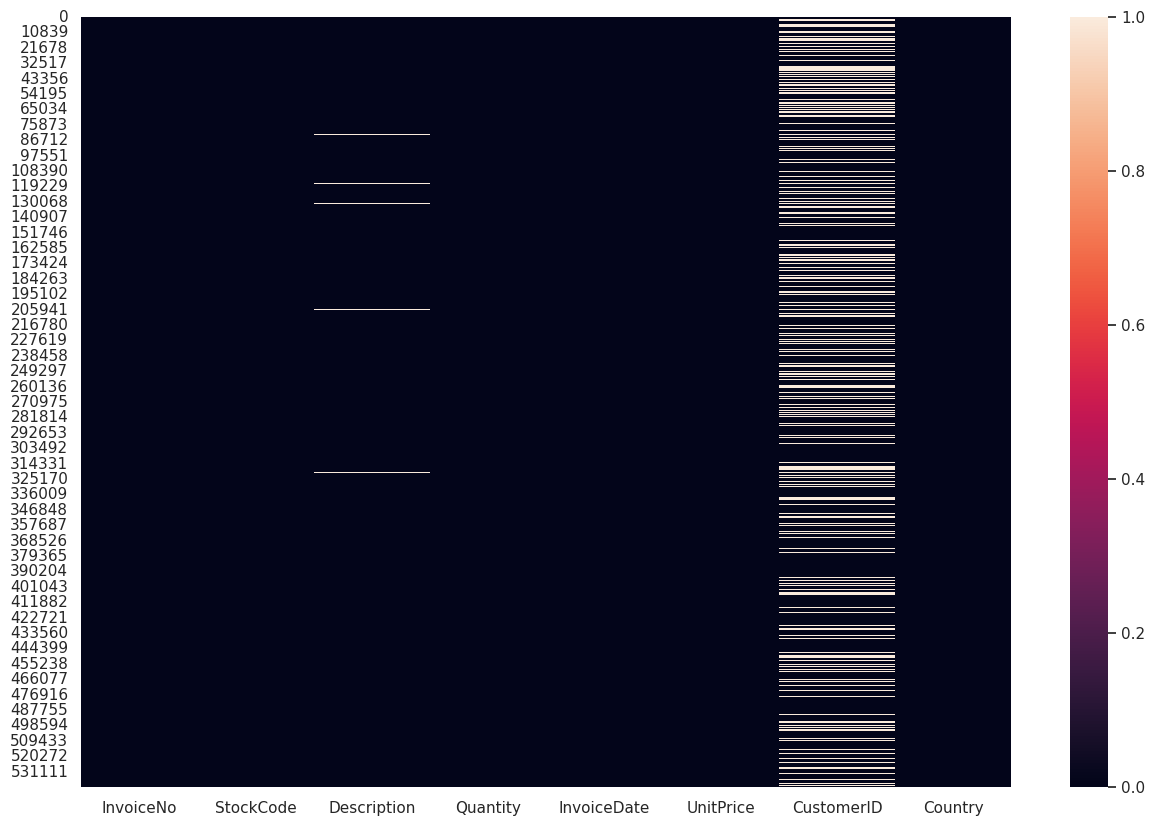

In [ ]:
# let's visualizing  the null values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

#### Null value treatment

In [ ]:
# Droping rows having missing values

df = df.dropna()
df.shape

(406829, 8)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### Duplicate Values

In [ ]:
df.duplicated().sum()

5225

### What did you know about your dataset?

**1- Data Overview**
  * We have **541909** **rows** and **8** **columns** provided in the data.

  * In the dataset we have **4 object** columns , **1 integer**, **1 float** and **1 datetime**.


**2- Checking the null values**
  * Fist we have **1454** null values in **Description** column.We have almost 26% null values in this column so we can not use this column in model training but we can use it in EDA.

  * We have **135080** null values in **CustomerID** column.


**3- Check Duplicate values in the dataset**

  * we have **5225** any Duplicate values in the dataset.

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Analysis 'Country' column**

In [ ]:
df['Country'].value_counts()

,count
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


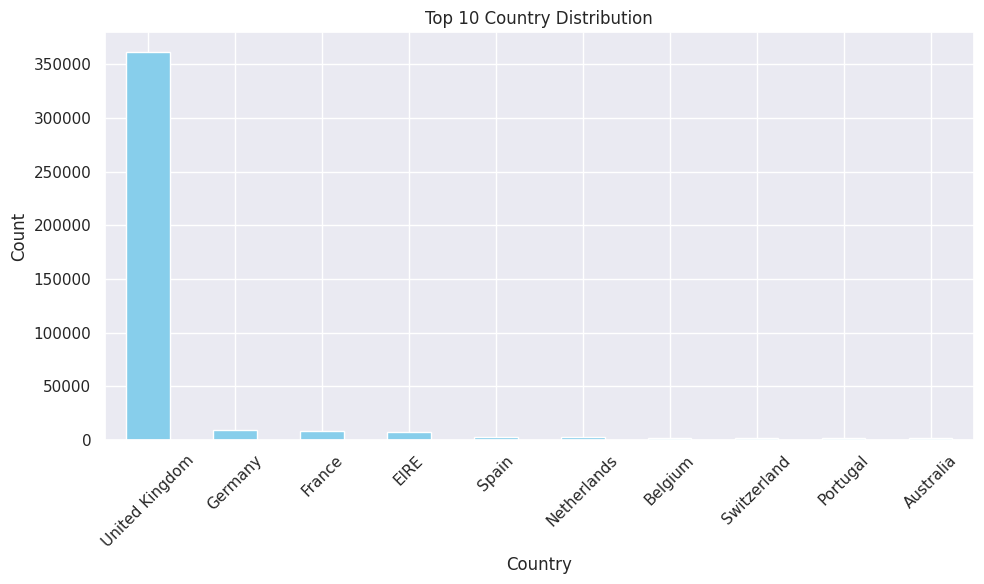

In [ ]:
country_counts = df['Country'].value_counts().head(10)

# Plotting the value counts as a bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**'Country' column**
  * According to plot we can say **United Kingdom**  is the top country.
  * **Germany** is the second most country.

### **Analysis 'StockCode' column**

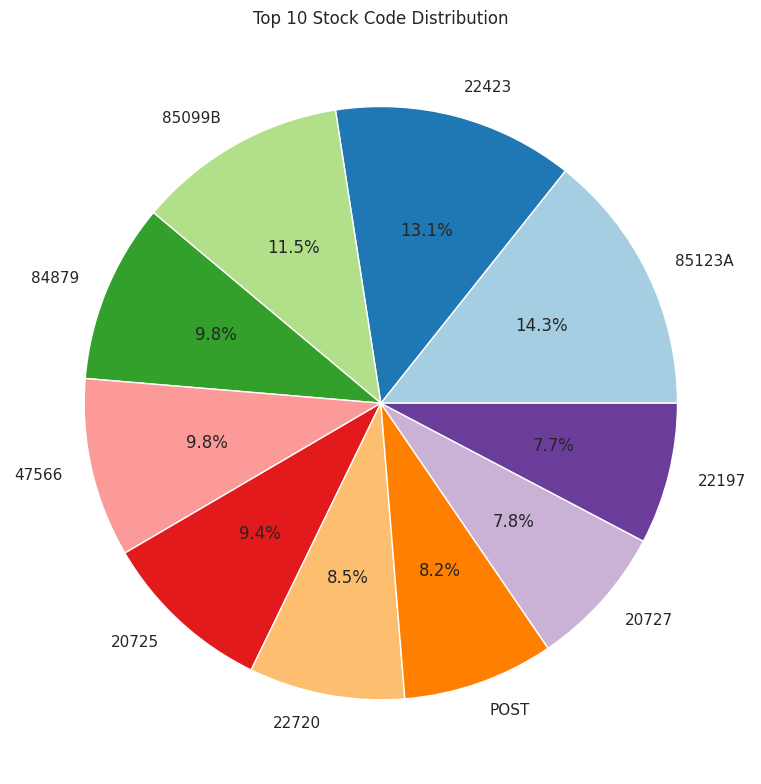

In [ ]:
stock_code_counts = df['StockCode'].value_counts()

# Plotting the pie chart for stock codes
plt.figure(figsize=(8, 8))
stock_code_counts.head(10).plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, legend=False)
plt.title('Top 10 Stock Code Distribution')
plt.ylabel('')  # Hide the y-label for better presentation
plt.tight_layout()
plt.show()

  * According to the graph **85123A**(13.4%) is the most common StockCode.



### **Analysis 'date_added' column:-**




**Let's create few other featers using date_added column**

In [ ]:
#feature engineering
#getting date in the right format and year/month extraction
df['date_added'] = pd.to_datetime(df['InvoiceDate'], format='%B %d, %Y', errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Extract month
df['month_added'] = df['date_added'].dt.month

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_added,year_added,month_added
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12


#### **month wise analysis:-**

In [ ]:
# check the month wise sales
df['month_added'].value_counts()

,count
month_added,
11,65598
10,50695
12,44511
9,40822
5,28908
6,27836
3,27822
8,27662
7,27502


<ipython-input-63-32d1db5cc1ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_added',data=df,palette="Accent")


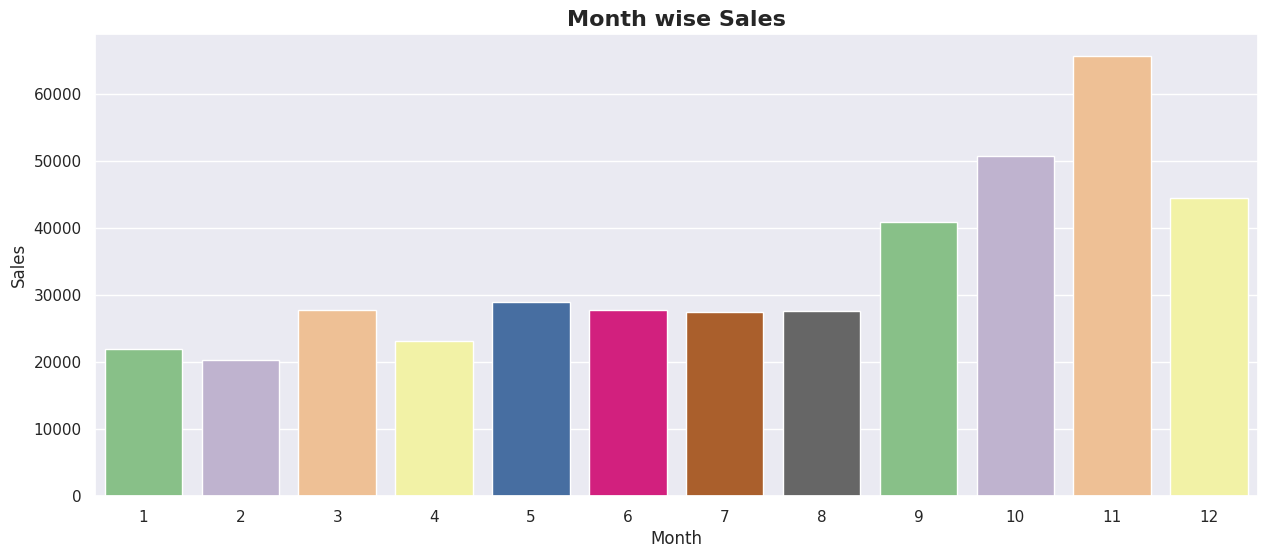

In [ ]:
#plot for month wise sales
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=df,palette="Accent")

plt.title('Month wise Sales',size='16',fontweight="bold")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**month wise sales**
  * We have so many sales in **November**(84711), **December**(68006).

#### **year wise Content release analysis:-**

In [ ]:

df['year_added'].value_counts()

,count
year_added,
2011,379979
2010,26850


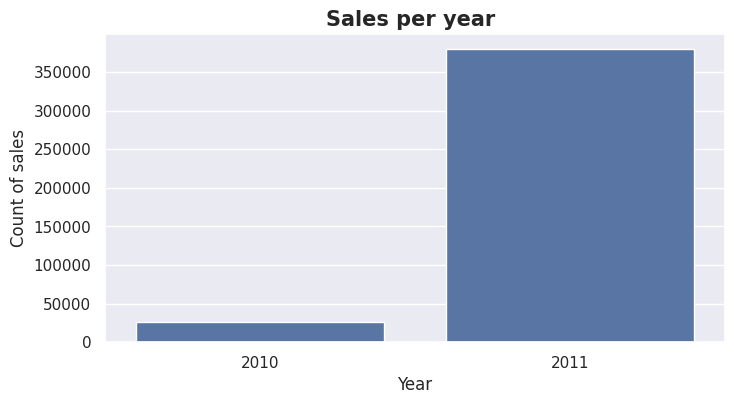

In [ ]:
#plot for year wise sales
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='year_added',data=df)

plt.title('Sales per year ',size='15',fontweight="bold")
plt.xlabel('Year')
plt.ylabel('Count of sales')
plt.show()

* Here we can see that most of the sales are in 2011.

### **Analysis 'Unit Price' column:-**




In [ ]:
df[['Description', 'UnitPrice']].sort_values(by='UnitPrice', ascending=False).head(10)

,Description,UnitPrice
222681,Manual,38970.00
173382,POSTAGE,8142.75
173277,POSTAGE,8142.75
173391,Manual,6930.00
268027,Manual,4287.63
422376,Manual,4161.06
422375,Manual,4161.06
422351,Manual,4161.06
406404,Manual,3949.32
406406,Manual,3949.32


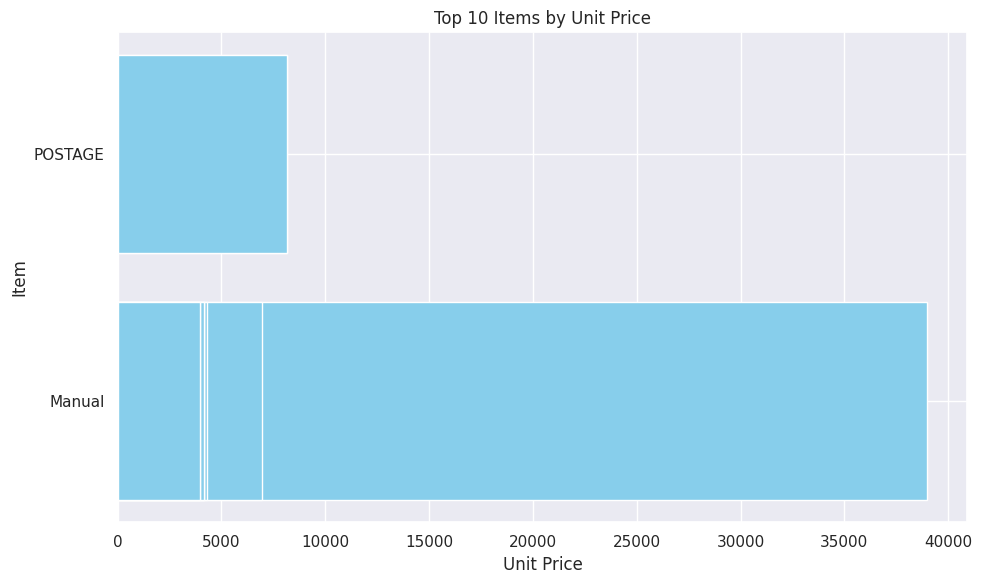

In [ ]:
top_unit_price = df[['Description', 'UnitPrice']].sort_values(by='UnitPrice', ascending=False).head(10)

# Plotting the top 10 items by unit price
plt.figure(figsize=(10, 6))
plt.barh(top_unit_price['Description'], top_unit_price['UnitPrice'], color='skyblue')
plt.title('Top 10 Items by Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

### **Analysis 'Description' column:-**

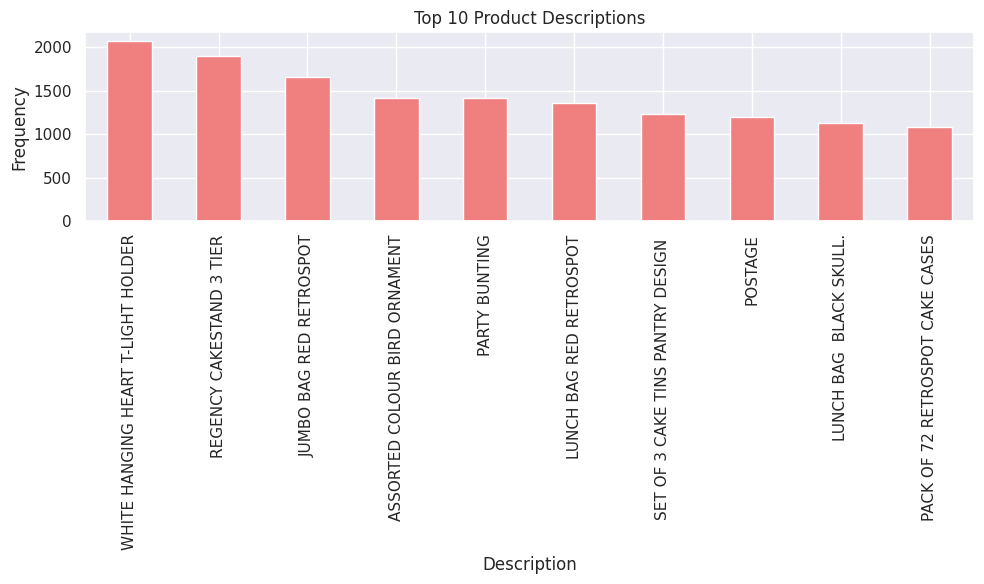

In [ ]:
top_descriptions = df['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_descriptions.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Product Descriptions')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


* **White Hanging Heart T-Light Holder** is the top description.

### **Analysis 'InvoiceDate' column:-**

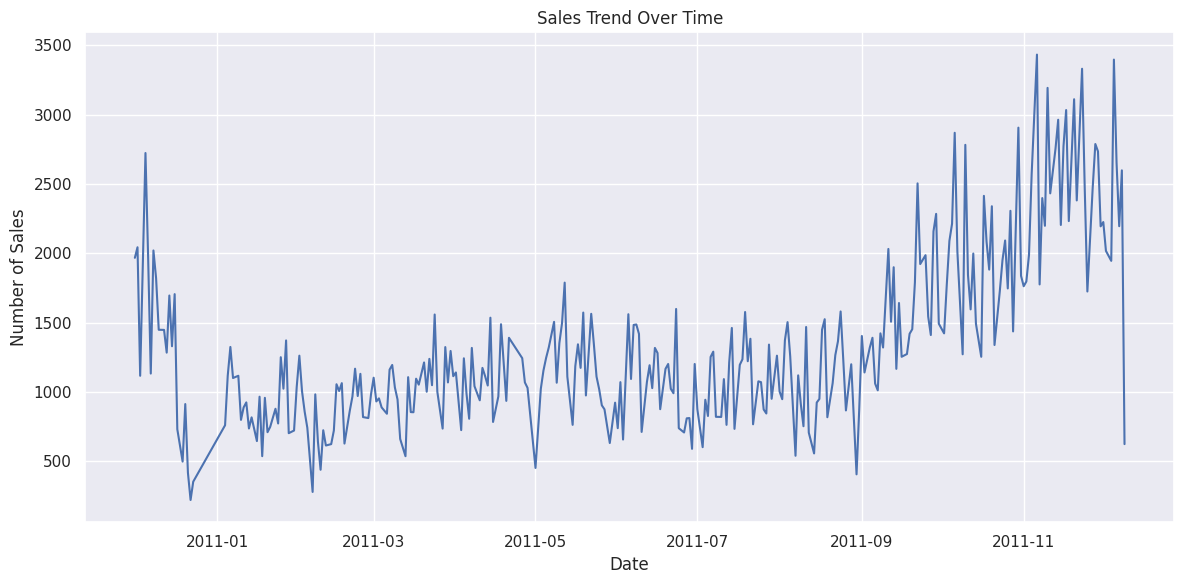

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
daily_sales = df.groupby(df['InvoiceDate'].dt.date).size()

plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()


### **Analysis 'Customer ID' column:-**

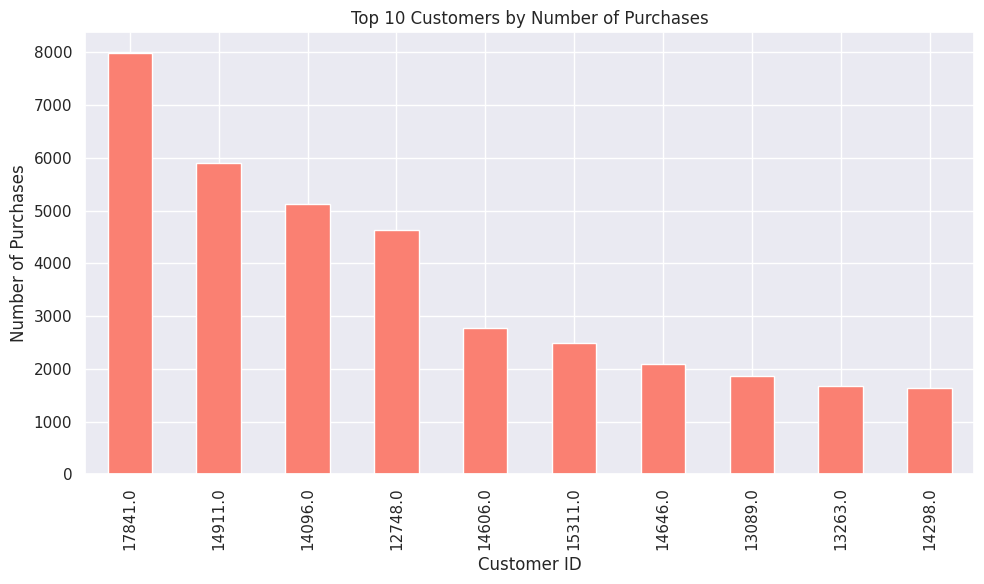

In [ ]:
customer_counts = df['CustomerID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
customer_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Customers by Number of Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()


* Customer with ID **17841** has made more transactions.

### **Analysis on 'Description' column:-**
**We will create a wordcloud to see which words appear the most in the Description.**

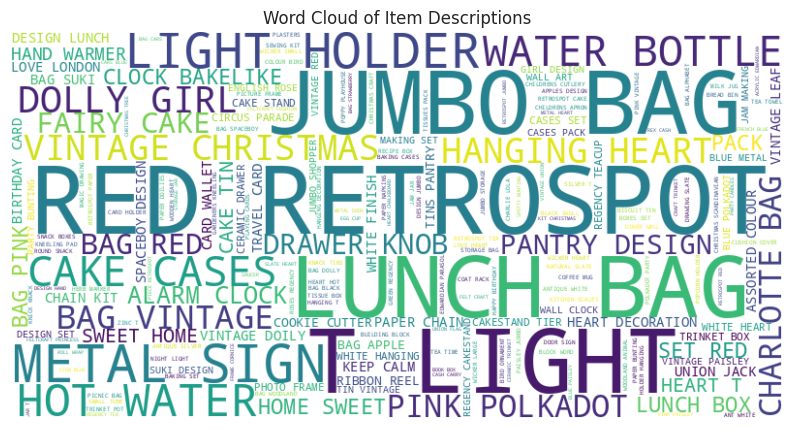

In [ ]:
df['Description'] = df['Description'].apply(str)

text = ' '.join(df['Description'].dropna())

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Item Descriptions')
plt.show()

**'description' column**
  * Most repeated words in the description are **RETROSPOT, LUNCH BAG, JUMBO BAG, LIGHT**.

## ***4. Feature Engineering & Data Pre-processing***

###**Data Preparation**

Add new columns

In [ ]:
df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# New Attribute : Frequency

rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# Convert to datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_added,year_added,month_added,Amount,Diff,text_info
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,15.30,373 days 04:24:00,white hanging heart tlight holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,20.34,373 days 04:24:00,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,22.00,373 days 04:24:00,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,20.34,373 days 04:24:00,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,20.34,373 days 04:24:00,red woolly hottie white heart


In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


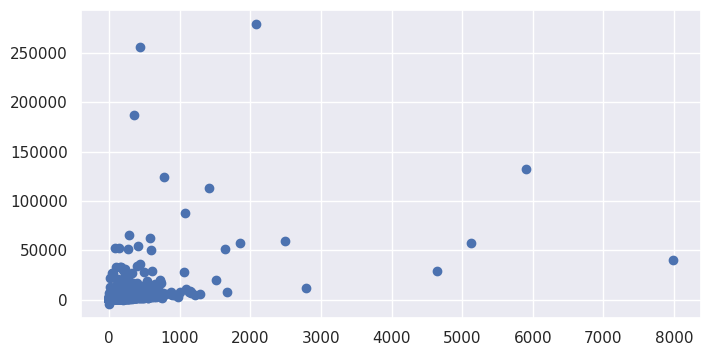

In [ ]:
plt.scatter(x=rfm.Frequency,y=rfm.Amount)

### **Feature Engineering**

we will add all text based or categorical columns

In [ ]:
# We will add all categorical and text based columns
df['text_info'] = df['Description']


In [ ]:
df['text_info'][0]

'WHITE HANGING HEART T-LIGHT HOLDER'

###  **Text cleaning**

In [ ]:
#text cleaning function
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [ ]:
# Applying above function on our combined column
df['text_info'] = df['text_info'].apply(clean_text)

In [ ]:
# we will convert all words in lowercase
df['text_info'] = df['text_info'].str.lower()

In [ ]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Stemming-**

In [ ]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [ ]:
# defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered





In [ ]:

def join_words(x):
  return " ".join(x)

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_added,year_added,month_added,Amount,Diff,text_info
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,15.30,373 days 04:24:00,white hanging heart tlight holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,20.34,373 days 04:24:00,white metal lantern


In [ ]:
words = df.text_info
words

,text_info
0,white hanging heart tlight holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
541904,pack of spaceboy napkins
541905,childrens apron dolly girl
541906,childrens cutlery dolly girl
541907,childrens cutlery circus parade


In [ ]:
X=rfm.iloc[:,1:]

In [ ]:
X=StandardScaler().fit_transform(X)

In [ ]:
X

array([[-0.23100099, -0.3917197 ,  2.32202285],
       [ 0.29343167,  0.38265697, -0.89373323],
       [-0.01231622, -0.26695902, -0.1691956 ],
       ...,
       [-0.20951263, -0.34439668, -0.83418219],
       [ 0.02390005,  2.85205812, -0.87388289],
       [-0.00744423, -0.0991774 , -0.48680114]])

## ***5. Cluster Model Implementation***

### **KMeans Clustering**

In [ ]:
# fitting the k means algorithm on lower features

msd=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(X)
    msd.append(kmean.inertia_)

Text(0.5, 1.0, 'Line plot of data')

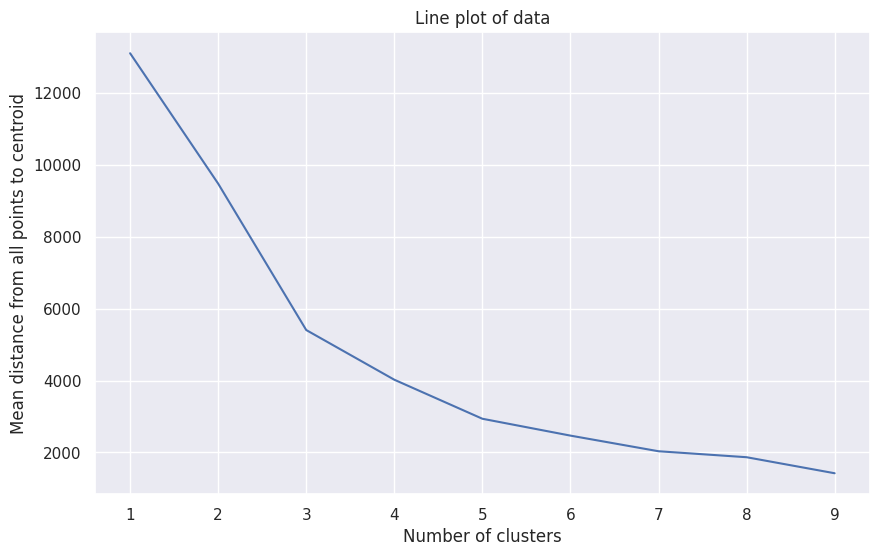

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),msd)
plt.xlabel("Number of clusters")
plt.ylabel("Mean distance from all points to centroid")
plt.title('Line plot of data')

In [ ]:
#for cluster=3
k_model=KMeans(n_clusters=3,init='k-means++',random_state=42)
k_model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
#Predict

k_model.predict(X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
rfm["label"]=k_model.labels_
label=k_model.labels_

### **Dendogram**

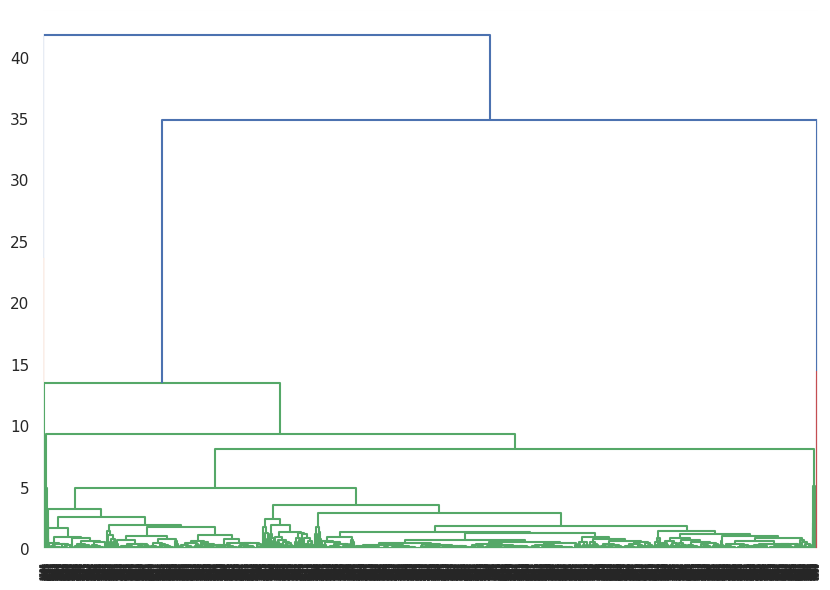

In [ ]:
#dentogram
plt.figure(figsize=(10, 7))
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

mergings = linkage(X, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### **Applying PCA-Principal Component Analysis to reduce dimensions.**

In [ ]:
pca=PCA()
X=pca.fit_transform(X)

In [ ]:
X

array([[-1.33536464,  1.94459453,  0.18425332],
       [ 0.7970907 , -0.62791529, -0.04069881],
       [-0.11701206, -0.20742537, -0.20815582],
       ...,
       [-0.02691304, -0.89938866, -0.22077201],
       [ 2.25541067, -0.25544651,  1.93554845],
       [ 0.12442634, -0.46242685, -0.13246286]])

Text(0.5, 1.0, 'Scatter plot of data')

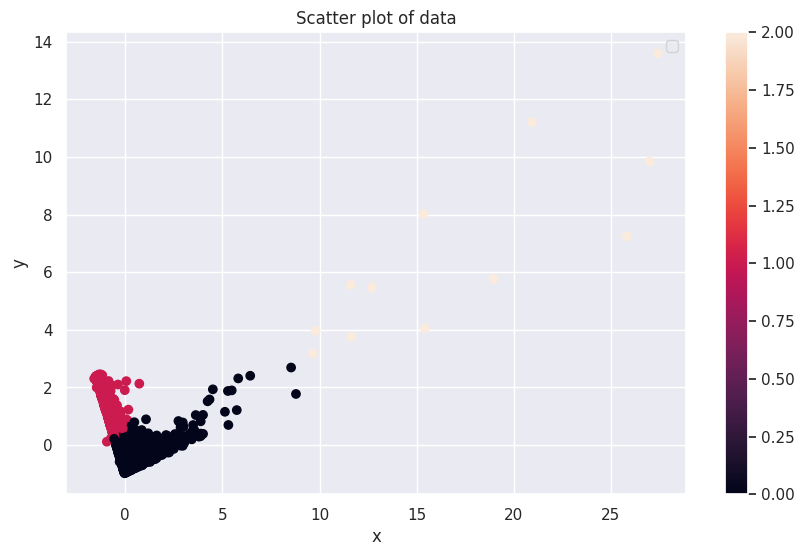

In [ ]:
# Scatter plot

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=rfm.label)
plt.colorbar()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data')

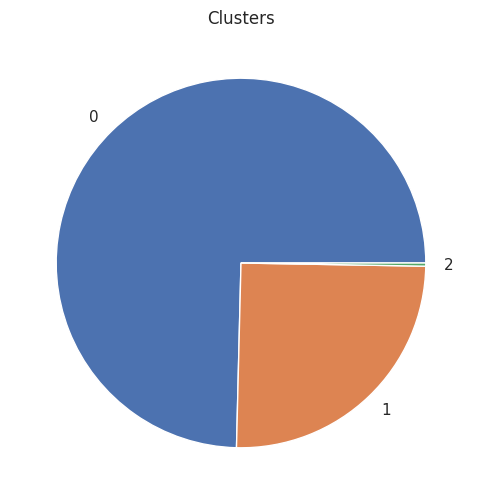

In [ ]:
#plot on pie

cluster_counts=rfm.label.value_counts(normalize=True)
plt.figure(figsize=(10,6))
plt.pie(cluster_counts.values,labels=cluster_counts.index,)
plt.title("Clusters")
plt.show()

<ipython-input-137-485a2bada016>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=rfm.label,y=rfm.Amount,palette="Paired")


Text(0.5, 1.0, 'Box plot of the data')

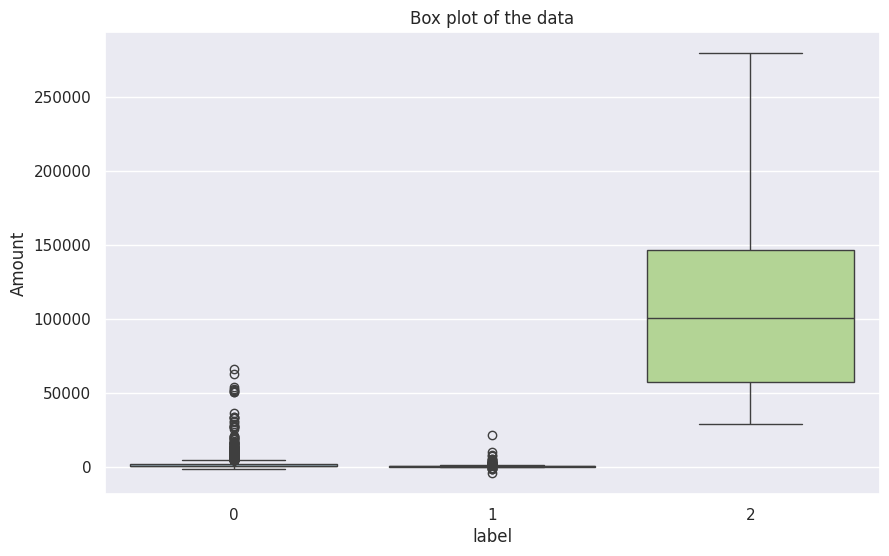

In [ ]:
#Box plot

plt.figure(figsize=(10,6))
sns.boxplot(x=rfm.label,y=rfm.Amount,palette="Paired")
plt.title("Box plot of the data")

### **Silhouette Score Elbow**

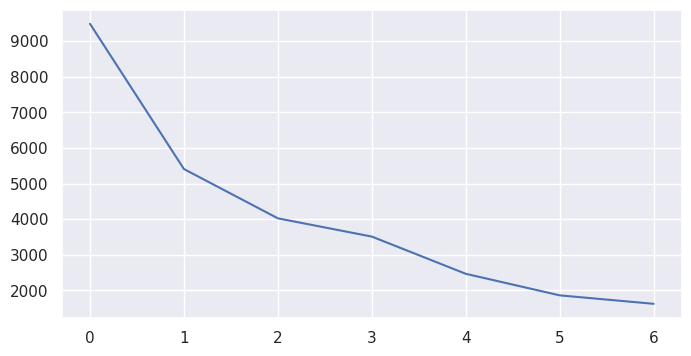

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



For n_clusters=2, the silhouette score is 0.9344641162235822
For n_clusters=3, the silhouette score is 0.6003883114752382
For n_clusters=4, the silhouette score is 0.6052738238414823
For n_clusters=5, the silhouette score is 0.6149580516850673
For n_clusters=6, the silhouette score is 0.5170295709586512
For n_clusters=7, the silhouette score is 0.5276439684394704
For n_clusters=8, the silhouette score is 0.4685443286899407


For n_clusters = 2 The average silhouette_score is : 0.5757864490391179
For n_clusters = 3 The average silhouette_score is : 0.6003883114752382
For n_clusters = 4 The average silhouette_score is : 0.5981422039499412
For n_clusters = 5 The average silhouette_score is : 0.615818460628786
For n_clusters = 6 The average silhouette_score is : 0.5143443289078143
For n_clusters = 7 The average silhouette_score is : 0.5238467453014489
For n_clusters = 8 The average silhouette_score is : 0.5226630267514333
For n_clusters = 9 The average silhouette_score is : 0.5218086503712748
For n_clusters = 10 The average silhouette_score is : 0.4535591926074167
For n_clusters = 11 The average silhouette_score is : 0.4270055814949126
For n_clusters = 12 The average silhouette_score is : 0.4268604268031426
For n_clusters = 13 The average silhouette_score is : 0.4268006436526223
For n_clusters = 14 The average silhouette_score is : 0.4109485348658735
For n_clusters = 15 The average silhouette_score is : 0.3960

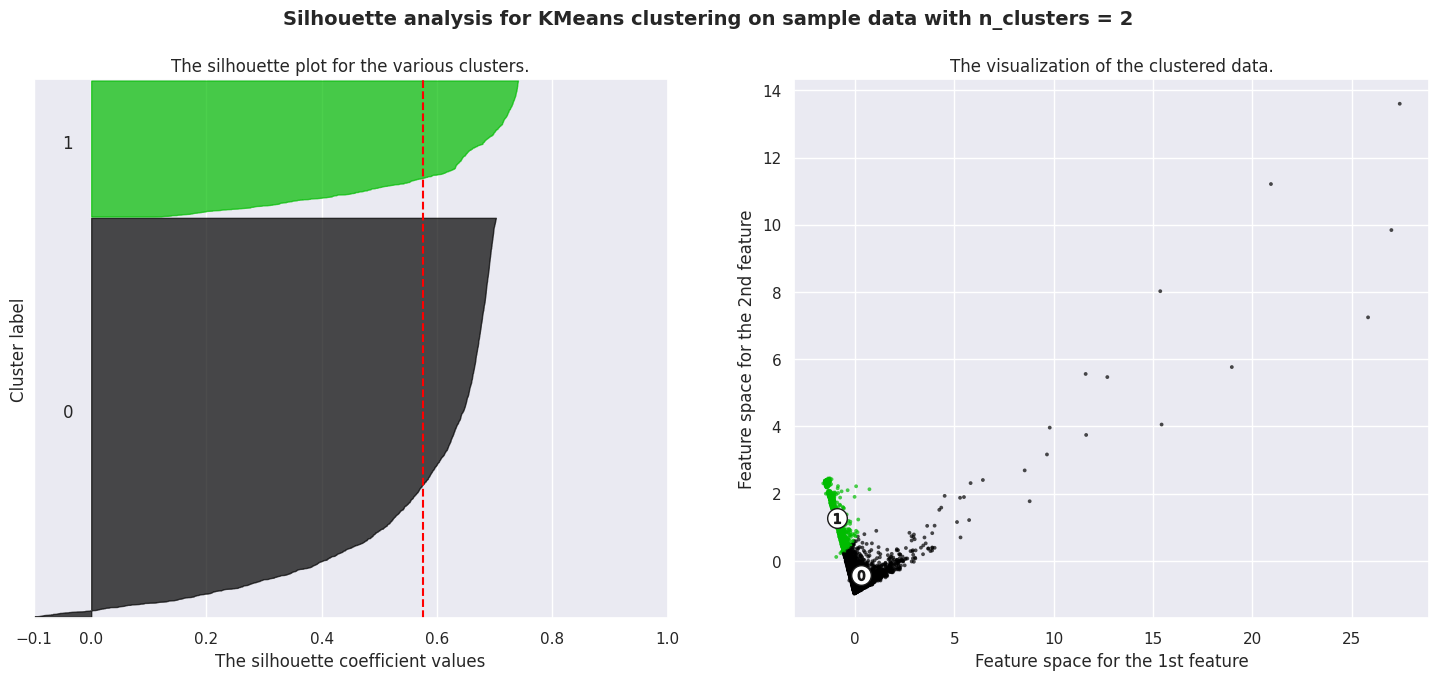

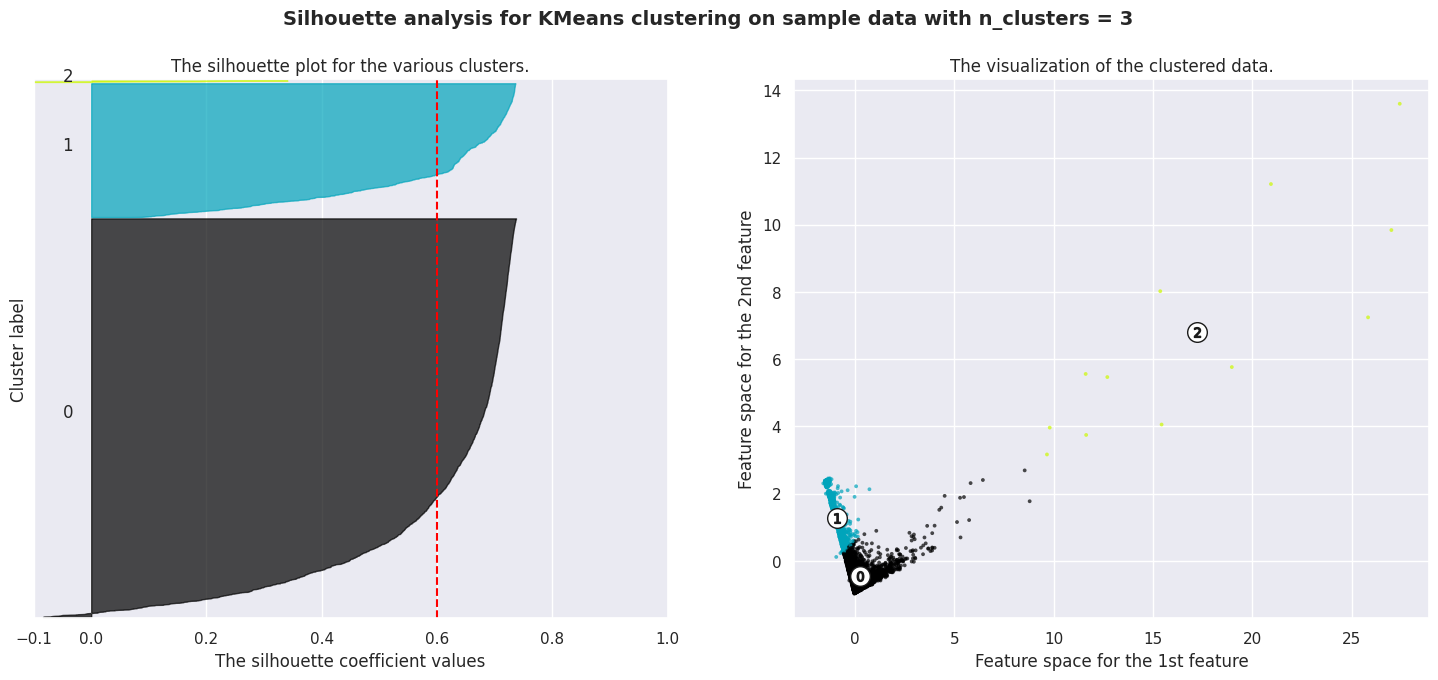

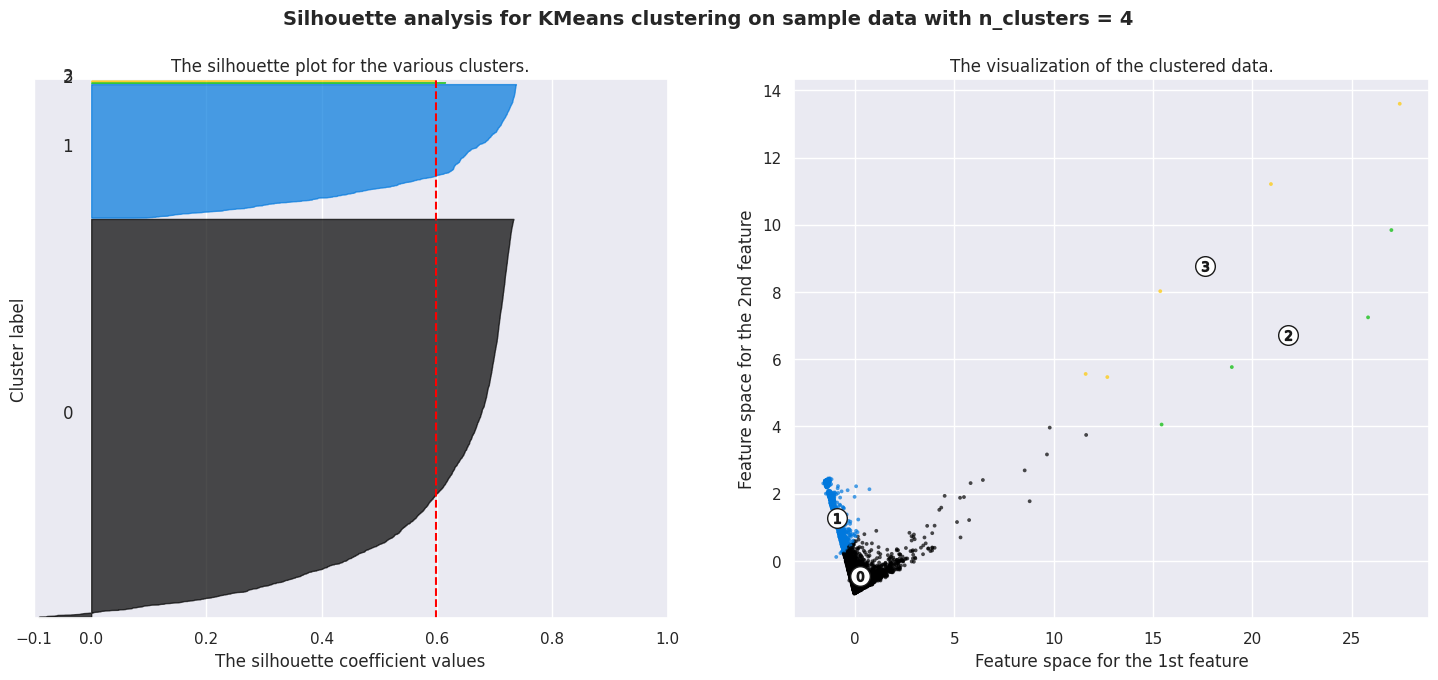

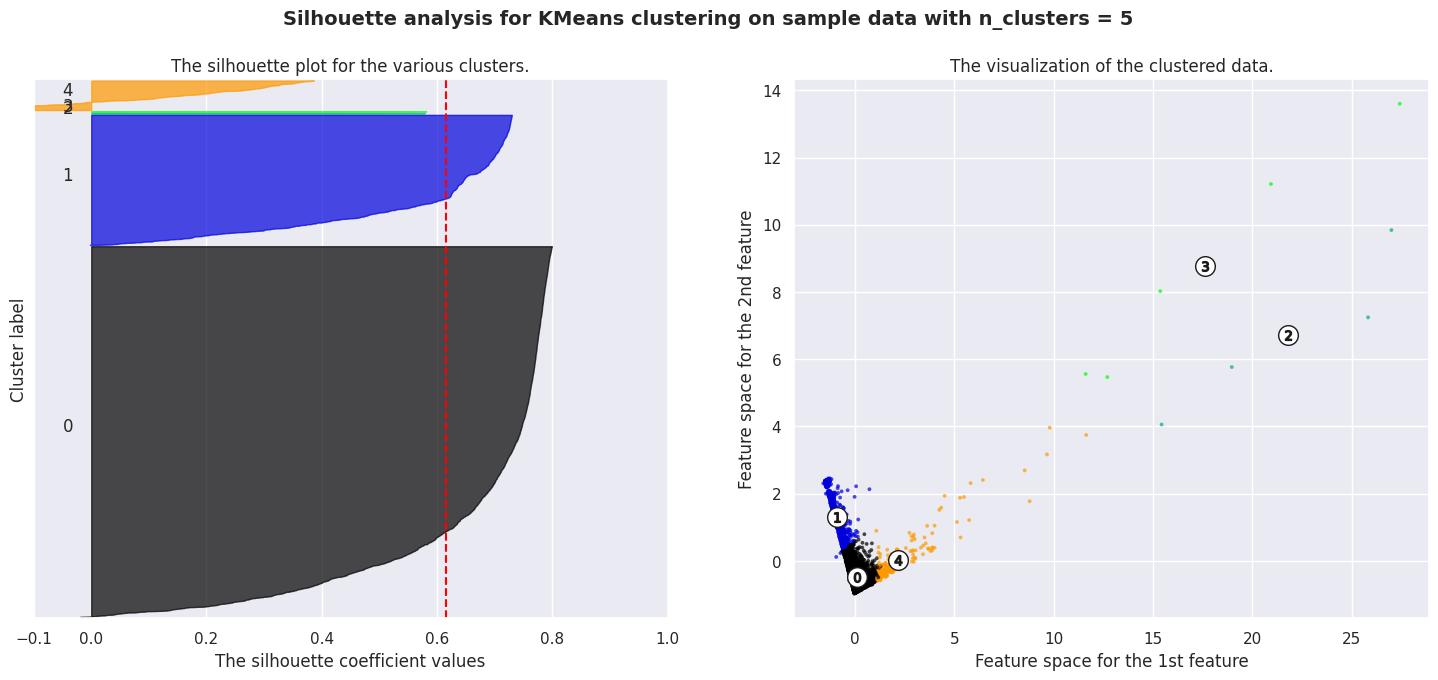

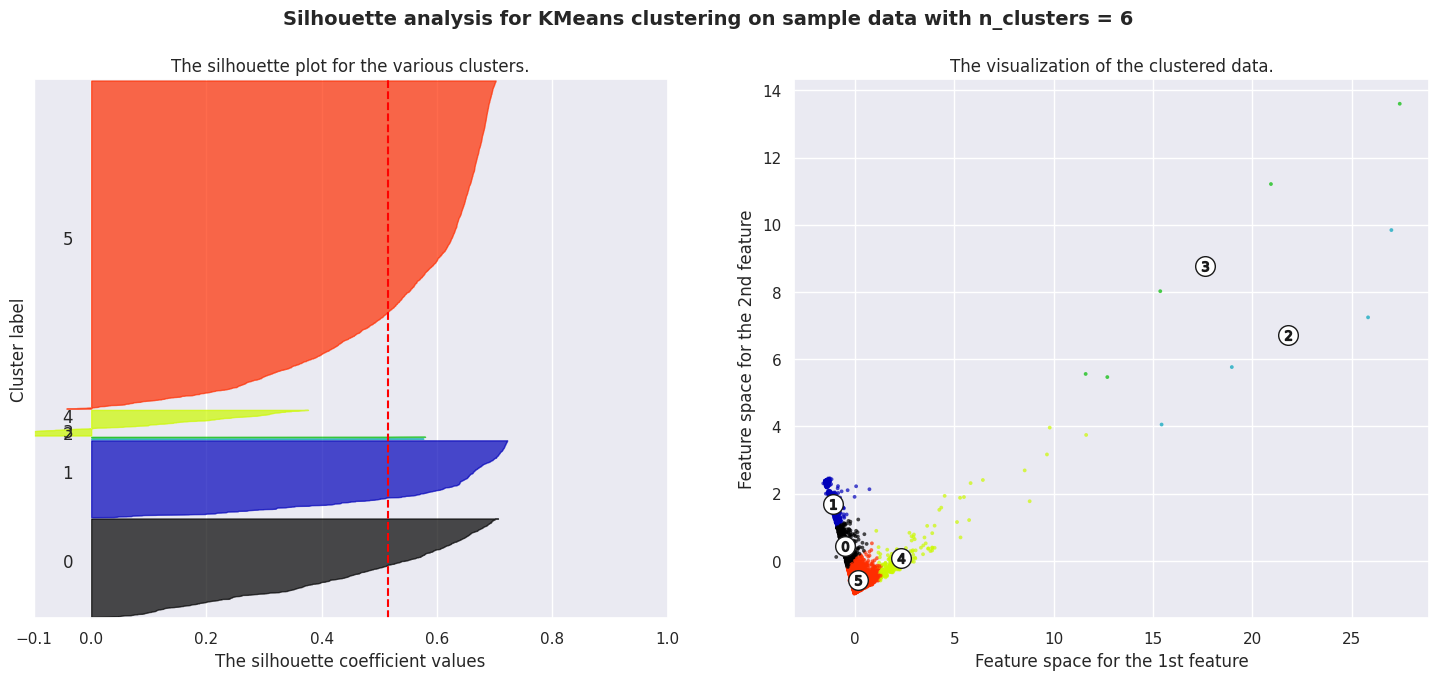

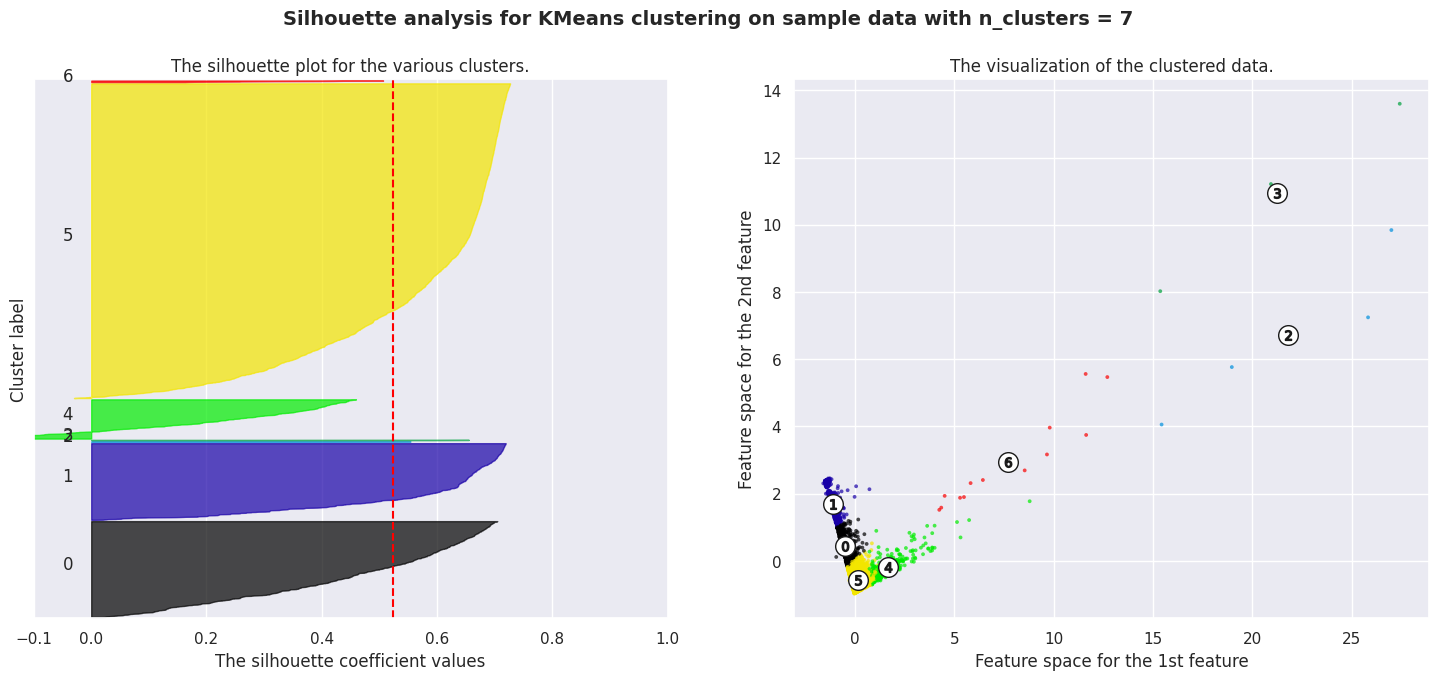

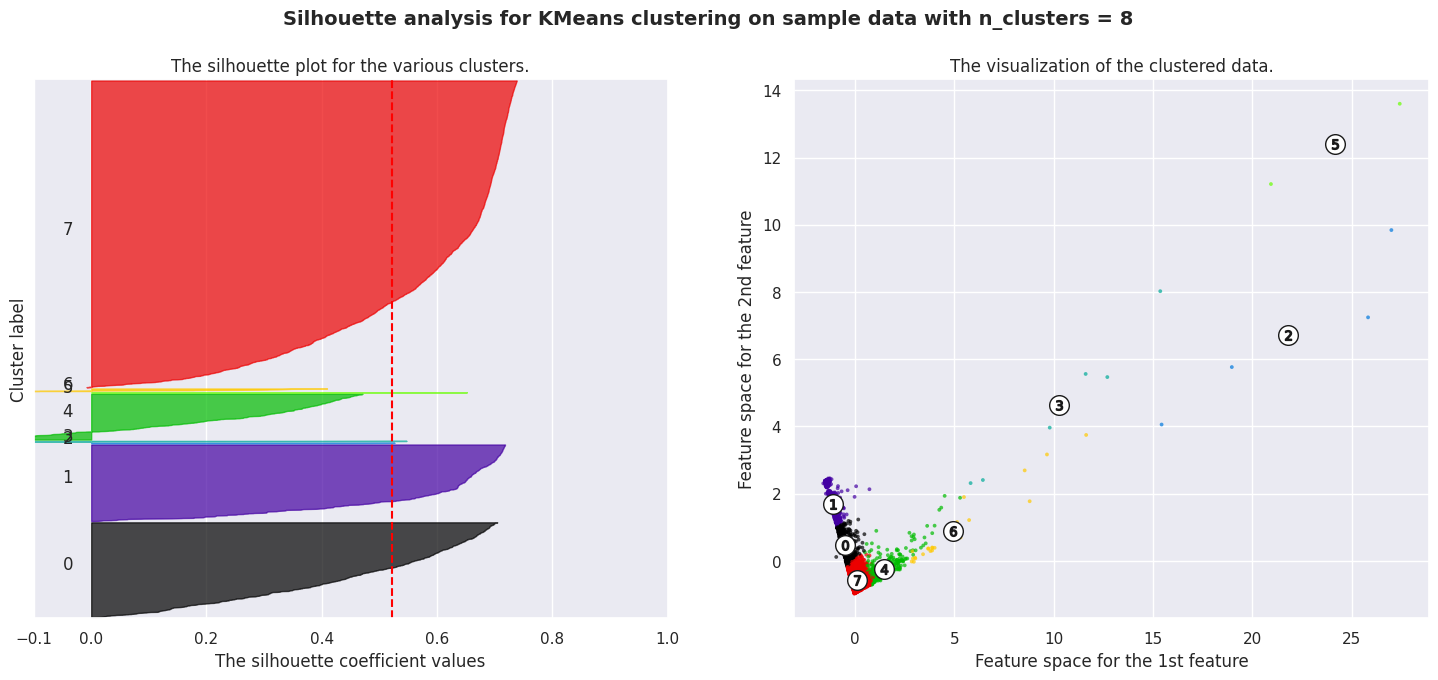

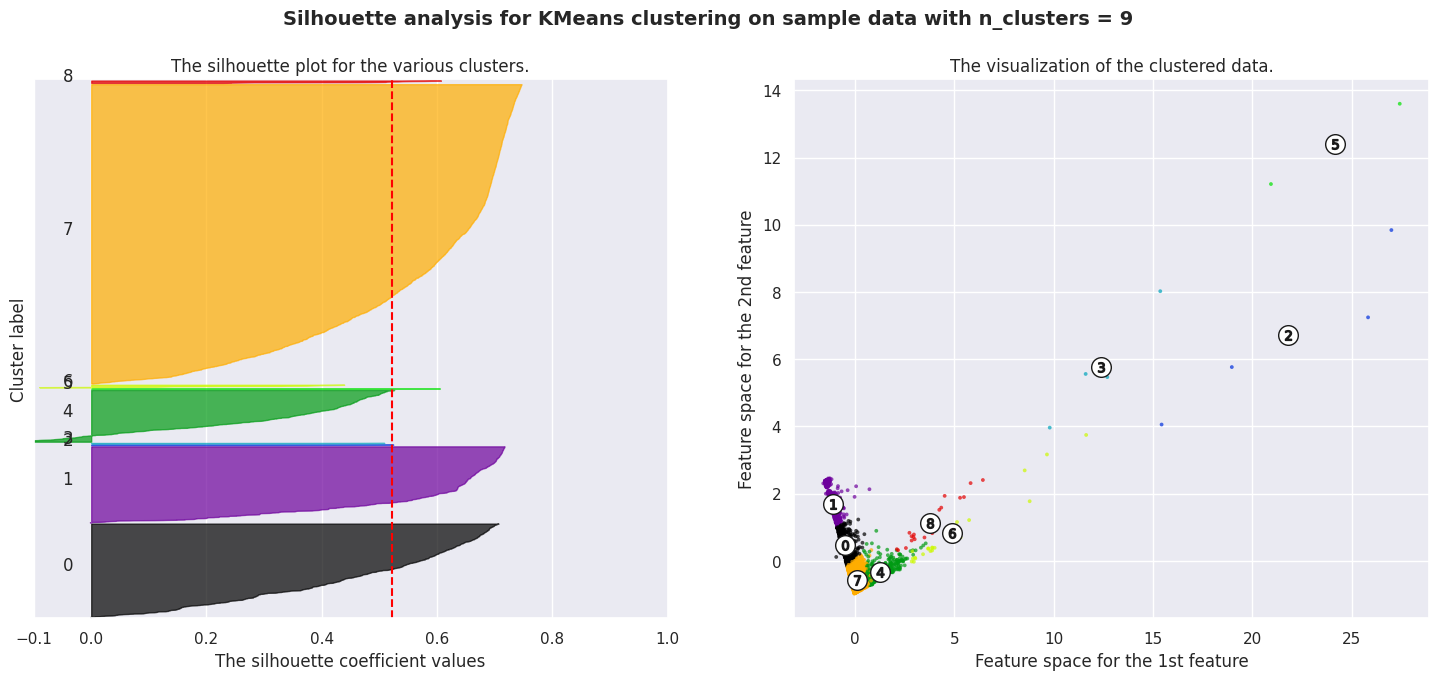

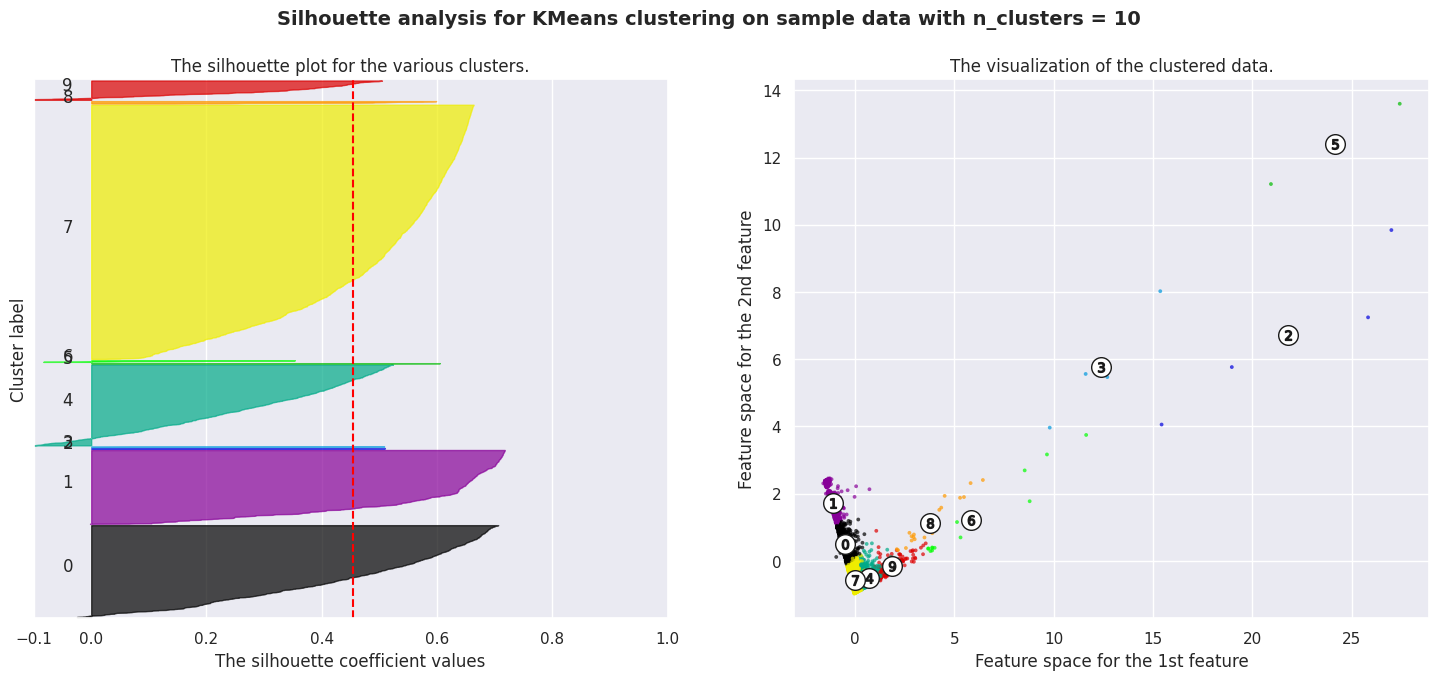

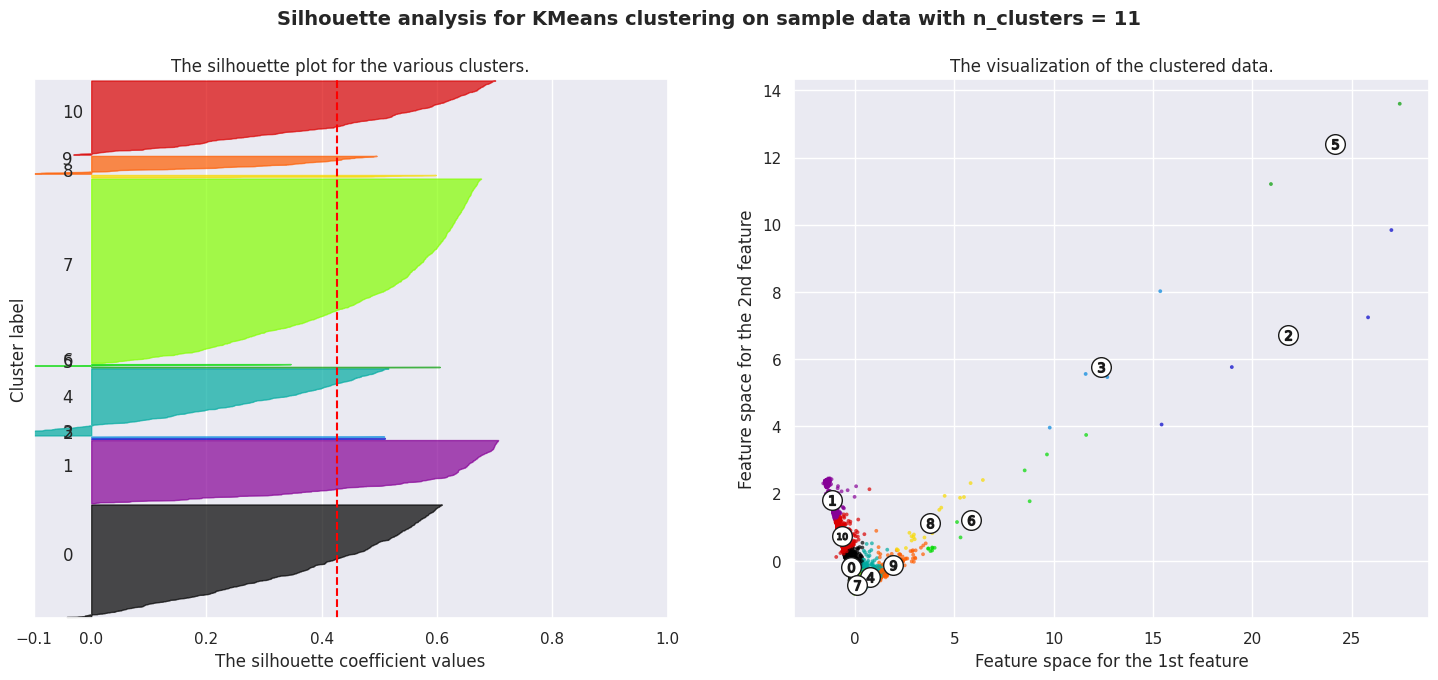

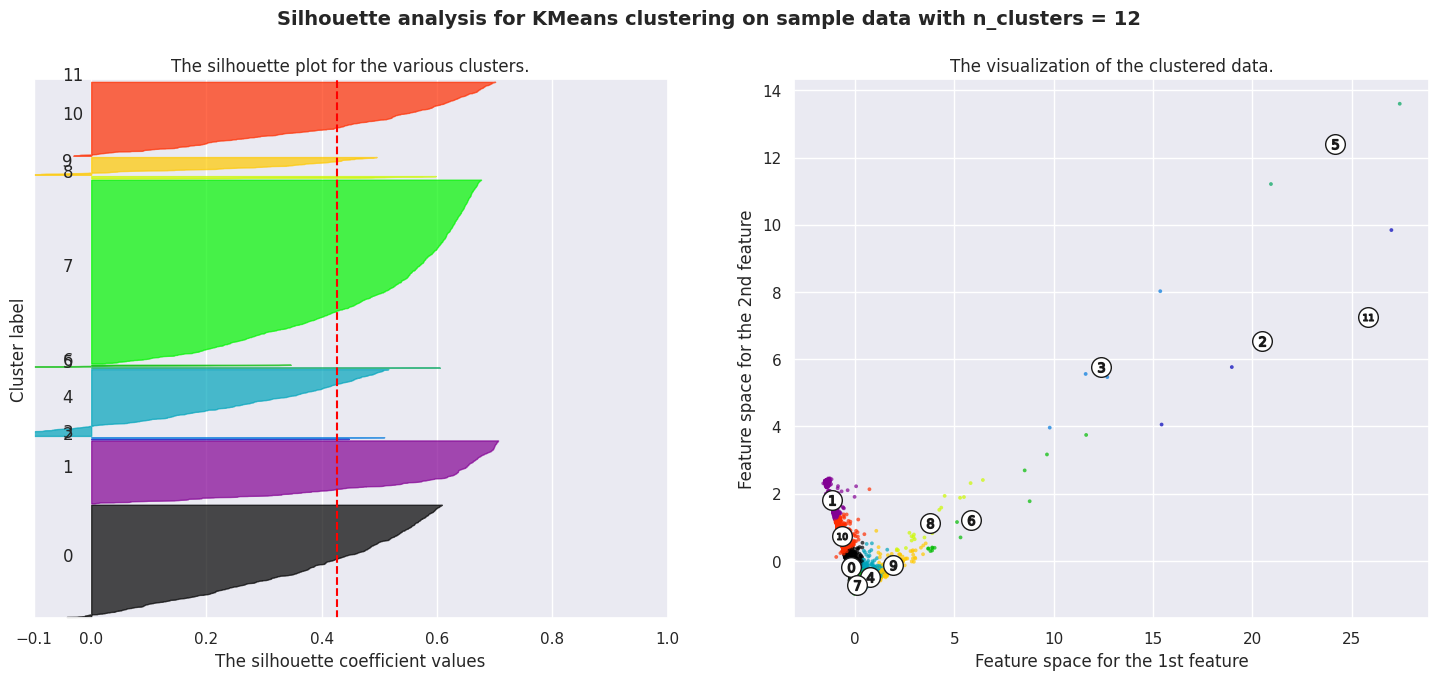

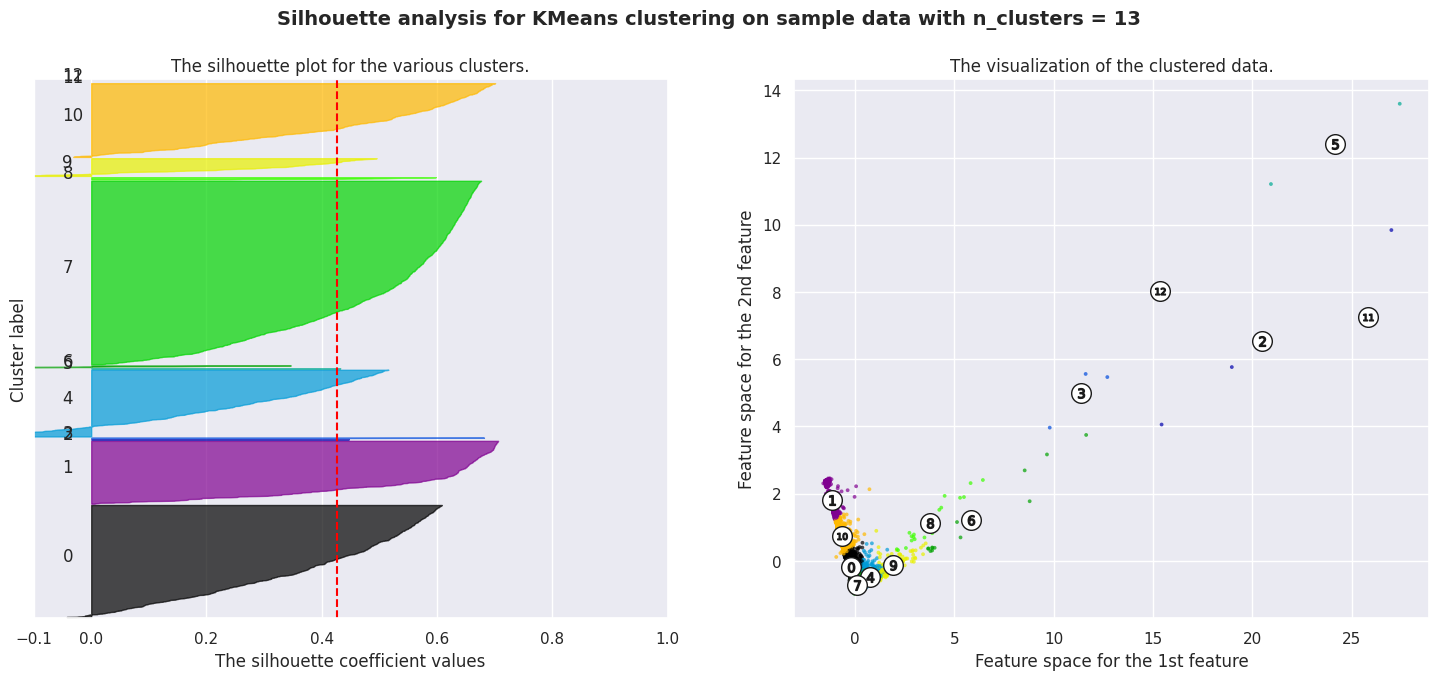

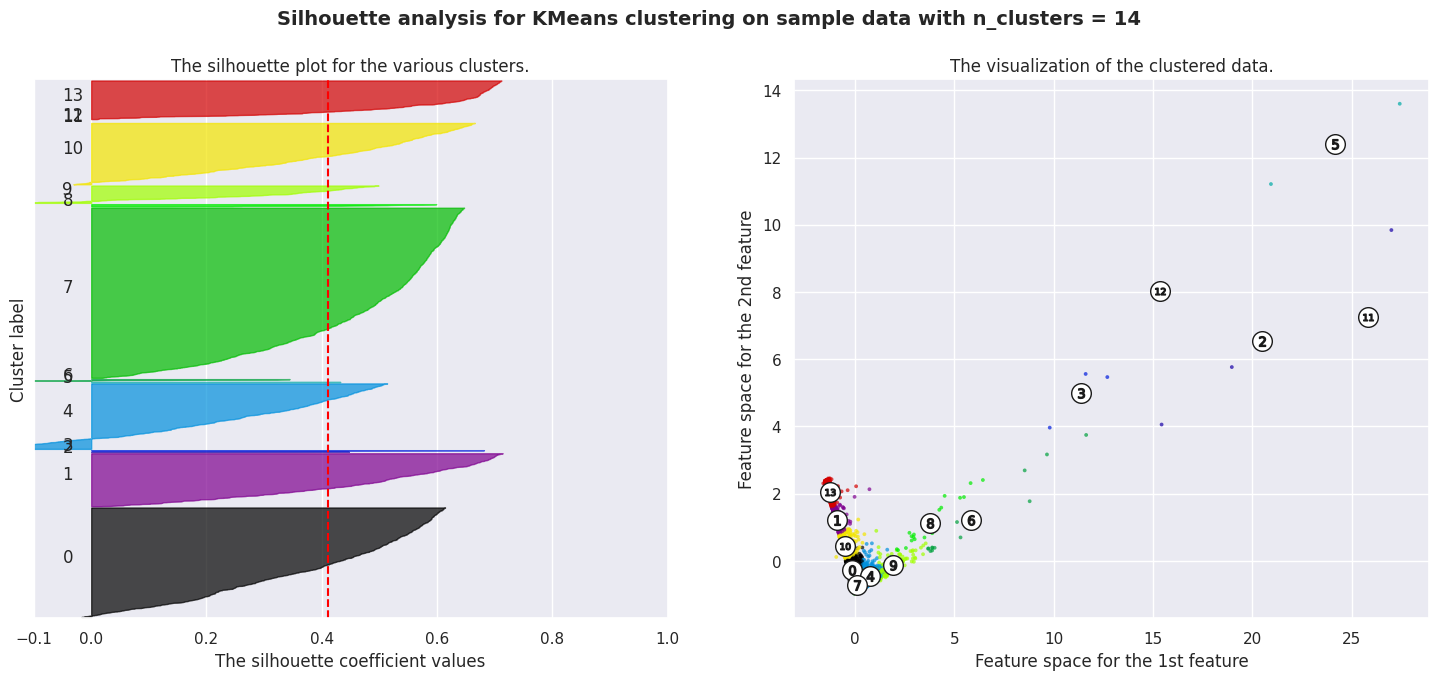

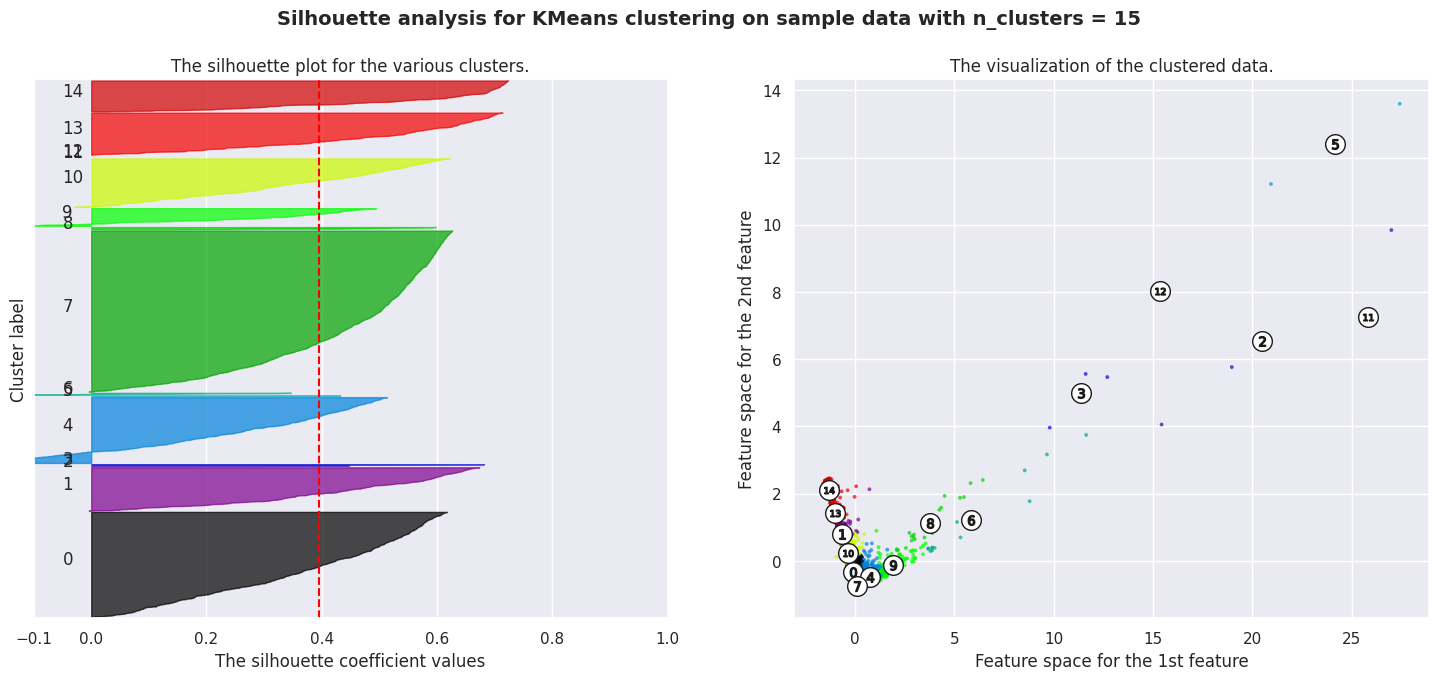

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Conclusion:-**

## **1- Data Overview**

**1- Data Overview**
  * We have 541909 rows and 8 columns provided in the data.

  * In the dataset we have **4 object** columns and **3 integer** and **1** column as datetime.


**2- Checking the null values**
  * Fist we have **1454** null values in **Description** column.We have almost 26% null values in this column so we can not use this column in model training but we can use it in EDA.

  * We have **135080** null values in **CustomerID** column.


**3- Check Duplicate values in the dataset**

  * we have **5225** any Duplicate values in the dataset.


---



## **2- Exploratory Data Analysis**

**type Country**
  * United Kingdom is having highest sales

**'StockCode' column**
  * According to the graph **85123A**(13.4%) is the most common StockCode.

**'description' column**

  * **White Hanging Heart T-Light Holder** is the top description.

---


## **3- Data pre-processing**

**1- Feature Engineering**
  * For train the model we use 'CustomerID', 'Amount', 'Frequency', 'Recency' column.

**2- We performe Text cleaning as our next step**
  * convert all words in lowercase.

**3- Applying PCA-Principal Component Analysis to reduce dimensions.**
  * We use 3000 components



---


## **4- Applying models**

**1- Find the value of clusters**
  * WE use Elbow method for finding k values.
  * Also use Silhouette Score for best score.
  * Also use Dendogram for finding the value of clusters.
  